In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Timeframe 2019 - 2023

In [2]:
import datetime
data_types = {3: str}
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y')
dataset = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes_20240317.csv',dtype=data_types)
dataset['CRASH DATE'] = pd.to_datetime(dataset['CRASH DATE'], format='%m/%d/%Y')
dataset.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

CONTRIBUTING FACTOR VEHICLE 1
Unspecified                       706133
Driver Inattention/Distraction    414651
Failure to Yield Right-of-Way     123123
Following Too Closely             110787
Backing Unsafely                   76659
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                79
Texting                               51
Listening/Using Headphones            24
1                                     10
Name: count, Length: 61, dtype: int64

In [8]:
df = dataset[((dataset['CRASH DATE'].dt.year == 2019) | (dataset['CRASH DATE'].dt.year == 2020)| 
         (dataset['CRASH DATE'].dt.year == 2021) | (dataset['CRASH DATE'].dt.year == 2022)
         |(dataset['CRASH DATE'].dt.year == 2023))]
df = df[df['BOROUGH']=="BROOKLYN"]
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,2021-09-11,9:35,BROOKLYN,11208,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14,8:13,BROOKLYN,11233,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
8,2021-12-14,21:10,BROOKLYN,11207,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN
15,2021-12-14,17:58,BROOKLYN,11217,40.681580,-73.974630,"(40.68158, -73.97463)",NaN,NaN,480 DEAN STREET,...,Unspecified,NaN,NaN,NaN,4486604,Tanker,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
16,2021-12-14,20:03,BROOKLYN,11226,40.650680,-73.958810,"(40.65068, -73.95881)",NaN,NaN,878 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,4486991,Sedan,NaN,NaN,NaN,NaN


In [9]:
df.dropna(subset=['LATITUDE','LONGITUDE'],inplace=True)

In [11]:
# Q2
# Pick two regions of time, say two years. Figure out what has changed from one year to the next. Figure out how to visualize the difference, in some way.

df_2019 = df[((df['CRASH DATE'].dt.month == 6) | (df['CRASH DATE'].dt.month == 7)) & (df['CRASH DATE'].dt.year == 2019)]
df_2022 = df[((df['CRASH DATE'].dt.month == 6) | (df['CRASH DATE'].dt.month == 7)) & (df['CRASH DATE'].dt.year == 2023)]
temp = df_2019.groupby(by='CRASH DATE').size().to_frame('accs_per_day')
print(temp.loc[:, 'accs_per_day'].mean())
temp = df_2022.groupby(by='CRASH DATE').size().to_frame('accs_per_day')
print(temp.loc[:, 'accs_per_day'].mean())
print(len(df_2019), len(df_2022))

129.5737704918033
64.08196721311475
7904 3909


In [13]:
ped_cyc_mot_columns = ['CRASH DATE','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED']

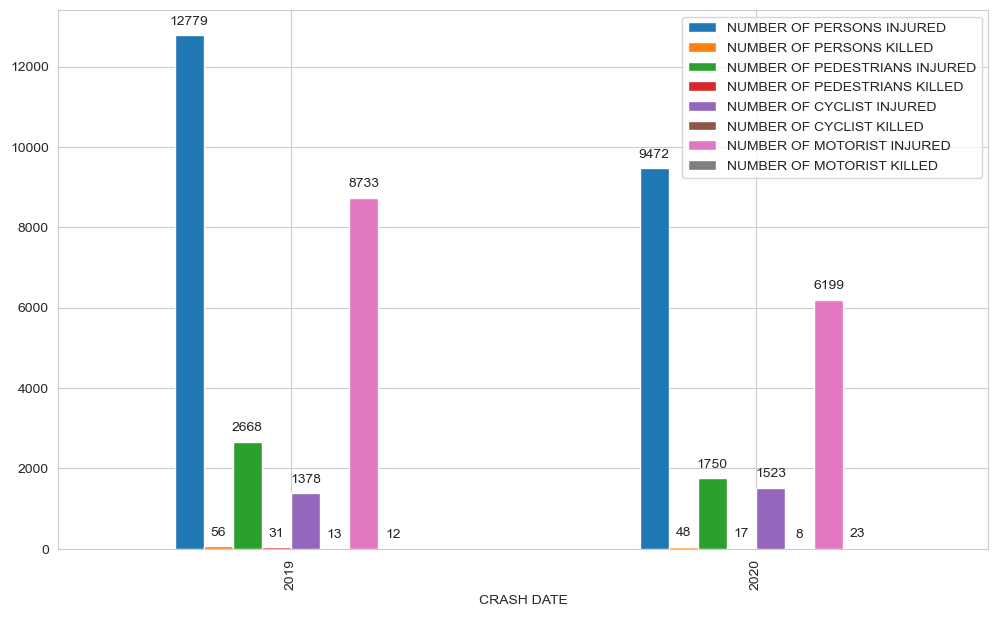

In [14]:
# Q2 Pick two regions of time, say two years. Figure out what has changed from one year to the next. Figure out how to visualize the difference, in some way.
ax = df[df['CRASH DATE'].dt.year.isin([2019,2020])].groupby(df['CRASH DATE'].dt.year)[ped_cyc_mot_columns[1:]].sum().plot(kind='bar',figsize=(12, 7))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# The number of accidents reduced from 2019 to 2020 beacuause of Covid

In [15]:
#Q3 How was June of 2020 different then June of 2022?
# Figure out how to show or demonstrate the difference.
# Were there more pedestrian accidents? Where there more accidents involving delivery vehicles?
june_2020 = (df[(df['CRASH DATE'].dt.month == 6) & (df['CRASH DATE'].dt.year == 2020)]
             .sort_values(by='CRASH DATE')
             .reset_index(drop=True))
june_2020

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-06-01,18:10,BROOKLYN,11216,40.682180,-73.946590,"(40.68218, -73.94659)",MARCY AVENUE,HALSEY STREET,NaN,...,NaN,NaN,NaN,NaN,4317834,Sedan,NaN,NaN,NaN,NaN
1,2020-06-01,1:10,BROOKLYN,11203,40.656208,-73.930880,"(40.656208, -73.93088)",NaN,NaN,700 UTICA AVENUE,...,NaN,NaN,NaN,NaN,4317862,Sedan,Sedan,NaN,NaN,NaN
2,2020-06-01,23:15,BROOKLYN,11214,40.613476,-74.003784,"(40.613476, -74.003784)",16 AVENUE,80 STREET,NaN,...,Unspecified,Unspecified,NaN,NaN,4317214,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
3,2020-06-01,0:30,BROOKLYN,11231,40.678936,-74.001915,"(40.678936, -74.001915)",4 PLACE,HENRY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4317436,Sedan,NaN,NaN,NaN,NaN
4,2020-06-01,17:30,BROOKLYN,11207,40.675438,-73.886380,"(40.675438, -73.88638)",NaN,NaN,338 WARWICK STREET,...,Unspecified,NaN,NaN,NaN,4317459,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,2020-06-30,20:25,BROOKLYN,11211,40.713345,-73.960170,"(40.713345, -73.96017)",DRIGGS AVENUE,SOUTH 1 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4324540,Sedan,Motorcycle,NaN,NaN,NaN
1746,2020-06-30,23:05,BROOKLYN,11212,40.670383,-73.906040,"(40.670383, -73.90604)",PITKIN AVENUE,CHRISTOPHER AVENUE,NaN,...,NaN,NaN,NaN,NaN,4324555,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
1747,2020-06-30,18:13,BROOKLYN,11210,40.614063,-73.949090,"(40.614063, -73.94909)",NaN,NaN,2513 AVENUE O,...,Unspecified,NaN,NaN,NaN,4325054,Ambulance,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1748,2020-06-30,18:00,BROOKLYN,11210,40.636086,-73.950910,"(40.636086, -73.95091)",FARRAGUT ROAD,FLATBUSH AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4325057,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


<Axes: >

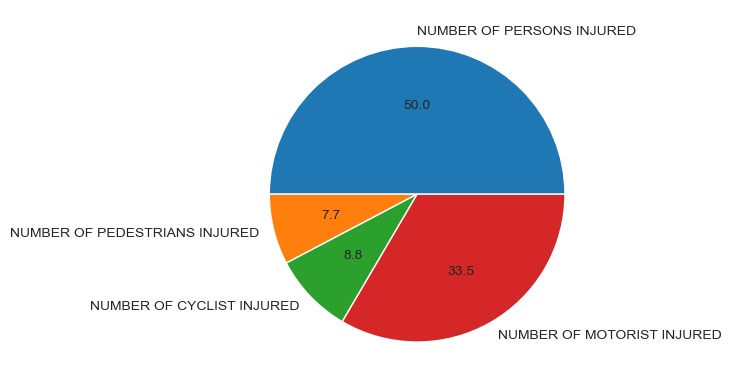

In [16]:
(june_2020
.filter(regex = '.*INJURED.*')
 .sum().plot(kind='pie',autopct='%1.1f'))

In [17]:
((june_2020
 .filter(regex='VEHICLE TYPE'))
 .stack(future_stack=True)
 .dropna()
 .value_counts(ascending=False)
 )


Sedan                                  1427
Station Wagon/Sport Utility Vehicle    1100
Bike                                    147
Box Truck                                69
Taxi                                     59
                                       ... 
UNK                                       1
Box                                       1
ACCESS A R                                1
RDS                                       1
AMBU                                      1
Name: count, Length: 61, dtype: int64

In [18]:
# Q3 How was June of 2020 different then June of 2022?
# Figure out how to show or demonstrate the difference.
# Were there more pedestrian accidents? Where there more accidents involving delivery vehicles?
june_2022 = (df[(df['CRASH DATE'].dt.month == 6) & (df['CRASH DATE'].dt.year == 2022)]
             .sort_values(by='CRASH DATE')
             .reset_index(drop=True))
june_2022

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2022-06-01,11:14,BROOKLYN,11232,40.650948,-74.007930,"(40.650948, -74.00793)",4 AVENUE,42 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4533599,Station Wagon/Sport Utility Vehicle,Bike,NaN,NaN,NaN
1,2022-06-01,15:20,BROOKLYN,11221,40.687500,-73.939384,"(40.6875, -73.939384)",NaN,NaN,644 GATES AVENUE,...,Unspecified,Unspecified,NaN,NaN,4533265,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
2,2022-06-01,15:41,BROOKLYN,11221,40.693443,-73.929016,"(40.693443, -73.929016)",NaN,NaN,1140 BROADWAY,...,Unspecified,NaN,NaN,NaN,4534300,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
3,2022-06-01,9:00,BROOKLYN,11204,40.623672,-73.990010,"(40.623672, -73.99001)",NaN,NaN,1690 60 STREET,...,NaN,NaN,NaN,NaN,4533466,Sedan,NaN,NaN,NaN,NaN
4,2022-06-01,10:45,BROOKLYN,11208,40.664745,-73.876930,"(40.664745, -73.87693)",NaN,NaN,806 SHEPHERD AVENUE,...,Unspecified,NaN,NaN,NaN,4533313,Sedan,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,2022-06-30,2:39,BROOKLYN,11217,40.686310,-73.974450,"(40.68631, -73.97445)",FULTON STREET,SOUTH PORTLAND AVENUE,NaN,...,NaN,NaN,NaN,NaN,4541979,Sedan,NaN,NaN,NaN,NaN
2070,2022-06-30,18:55,BROOKLYN,11203,40.643684,-73.929540,"(40.643684, -73.92954)",NaN,NaN,1182 UTICA AVENUE,...,Unspecified,NaN,NaN,NaN,4542516,Sedan,NaN,NaN,NaN,NaN
2071,2022-06-30,1:28,BROOKLYN,11236,40.633682,-73.898680,"(40.633682, -73.89868)",AVENUE M,REMSEN AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4542238,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2072,2022-06-30,14:50,BROOKLYN,11229,40.598510,-73.939570,"(40.59851, -73.93957)",BROWN STREET,AVENUE V,NaN,...,Unspecified,NaN,NaN,NaN,4542532,Sedan,Sedan,NaN,NaN,NaN


<Axes: >

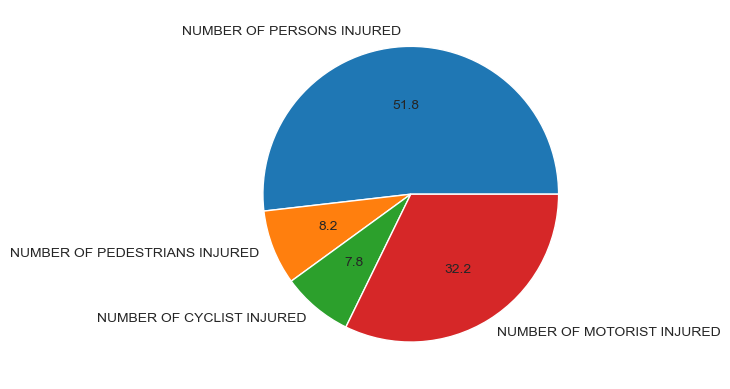

In [19]:
# Q3
(june_2022
 .filter(regex='.*INJURED.*')
 .sum()
 .plot(kind='pie', autopct='%1.1f')
 )

In [20]:
# Q3

((june_2022
 .filter(regex='VEHICLE TYPE'))
 .stack(future_stack=True)
 .dropna()
 .value_counts(ascending=False)
 )

Sedan                                  1635
Station Wagon/Sport Utility Vehicle    1213
Bike                                    162
Box Truck                                93
E-Bike                                   89
Bus                                      74
Pick-up Truck                            65
Motorcycle                               56
Taxi                                     46
E-Scooter                                43
Van                                      24
Tractor Truck Diesel                     22
Ambulance                                20
Moped                                    19
Dump                                     18
Flat Bed                                 11
Garbage or Refuse                        10
Convertible                               9
Carry All                                 6
PK                                        6
Tanker                                    4
Tractor Truck Gasoline                    4
AMBULANCE                       

In [21]:
# Q4 How was July of 2020 different then July of 2022? 
# Figure out how to show or demonstrate the difference. What was the reported cause of the accidents?
july_2020 = df[(df['CRASH DATE'].dt.month == 7) & (df['CRASH DATE'].dt.year == 2020)]
july_2020

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
64077,2020-07-22,12:30,BROOKLYN,11212,40.657658,-73.903770,"(40.657658, -73.90377)",NaN,NaN,853 STONE AVENUE,...,Unspecified,NaN,NaN,NaN,4441049,Sedan,NaN,NaN,NaN,NaN
220235,2020-07-10,11:30,BROOKLYN,11219,40.632393,-73.995300,"(40.632393, -73.9953)",NEW UTRECHT AVENUE,54 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4327759,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
220239,2020-07-08,18:10,BROOKLYN,11233,40.678024,-73.920265,"(40.678024, -73.920265)",NaN,NaN,1008 HERKIMER STREET,...,Unspecified,NaN,NaN,NaN,4328078,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
220240,2020-07-25,19:58,BROOKLYN,11233,40.677856,-73.928310,"(40.677856, -73.92831)",NaN,NaN,15 HUNTERFLY PLACE,...,View Obstructed/Limited,Unspecified,NaN,NaN,4332352,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
220252,2020-07-20,14:30,BROOKLYN,11229,40.603890,-73.953490,"(40.60389, -73.95349)",AVENUE S,EAST 19 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4332223,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236308,2020-07-30,14:30,BROOKLYN,11214,40.592870,-73.996070,"(40.59287, -73.99607)",NaN,NaN,1752 SHORE PARKWAY,...,Unspecified,NaN,NaN,NaN,4333431,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
236312,2020-07-25,6:06,BROOKLYN,11236,40.629898,-73.903270,"(40.629898, -73.90327)",NaN,NaN,1320 EAST 83 STREET,...,NaN,NaN,NaN,NaN,4333064,Sedan,NaN,NaN,NaN,NaN
236325,2020-07-25,15:30,BROOKLYN,11232,40.649303,-74.020300,"(40.649303, -74.0203)",52 STREET,1 AVENUE,NaN,...,NaN,NaN,NaN,NaN,4331617,Sedan,NaN,NaN,NaN,NaN
236336,2020-07-12,6:57,BROOKLYN,11214,40.602840,-74.009650,"(40.60284, -74.00965)",NaN,NaN,8866 BAY 16 STREET,...,Unspecified,NaN,NaN,NaN,4328485,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [22]:
# Q4 How was July of 2020 different then July of 2022? 
# Figure out how to show or demonstrate the difference. What was the reported cause of the accidents?
july_2022 = (df[(df['CRASH DATE'].dt.month == 7) & (df['CRASH DATE'].dt.year == 2022)]
                .sort_values(by='CRASH DATE')
             .reset_index(drop=True)
             )
july_2022

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2022-07-01,11:00,BROOKLYN,11206,40.707520,-73.94903,"(40.70752, -73.94903)",NaN,NaN,38 MESEROLE STREET,...,NaN,NaN,NaN,NaN,4544415,Box Truck,NaN,NaN,NaN,NaN
1,2022-07-01,20:30,BROOKLYN,11207,40.662780,-73.88086,"(40.66278, -73.88086)",LINDEN BOULEVARD,ASHFORD STREET,NaN,...,NaN,NaN,NaN,NaN,4544381,Sedan,NaN,NaN,NaN,NaN
2,2022-07-01,18:50,BROOKLYN,11238,40.684160,-73.96907,"(40.68416, -73.96907)",FULTON STREET,CLERMONT AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4543643,Taxi,Sedan,NaN,NaN,NaN
3,2022-07-01,2:28,BROOKLYN,11235,40.588978,-73.94943,"(40.588978, -73.94943)",NaN,NaN,2971 OCEAN AVENUE,...,Unspecified,Unspecified,NaN,NaN,4542527,Sedan,Sedan,Sedan,NaN,NaN
4,2022-07-01,2:00,BROOKLYN,11212,40.669823,-73.90981,"(40.669823, -73.90981)",PITKIN AVENUE,THATFORD AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4543393,E-Scooter,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,2022-07-31,4:15,BROOKLYN,11212,40.669960,-73.90889,"(40.66996, -73.90889)",PITKIN AVENUE,OSBORN STREET,NaN,...,Following Too Closely,NaN,NaN,NaN,4552469,Bus,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1929,2022-07-31,7:00,BROOKLYN,11214,40.582638,-73.98623,"(40.582638, -73.98623)",NaN,NaN,2965 CROPSEY AVENUE,...,Unspecified,NaN,NaN,NaN,4551040,Sedan,NaN,NaN,NaN,NaN
1930,2022-07-31,14:05,BROOKLYN,11239,40.655785,-73.86289,"(40.655785, -73.86289)",NaN,NaN,519 GATEWAY DRIVE,...,NaN,NaN,NaN,NaN,4551806,Sedan,NaN,NaN,NaN,NaN
1931,2022-07-31,14:00,BROOKLYN,11203,40.661670,-73.93727,"(40.66167, -73.93727)",MAPLE STREET,TROY AVENUE,NaN,...,NaN,NaN,NaN,NaN,4551145,Sedan,NaN,NaN,NaN,NaN


In [23]:
# Q4 How was July of 2020 different then July of 2022? 
# Figure out how to show or demonstrate the difference. What was the reported cause of the accidents?
ped_cyc_mot_columns = ['CRASH DATE','NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED']
{f'{c}':sum for c in ped_cyc_mot_columns[1:]}


{'NUMBER OF PERSONS INJURED': <function sum(iterable, /, start=0)>,
 'NUMBER OF PERSONS KILLED': <function sum(iterable, /, start=0)>,
 'NUMBER OF PEDESTRIANS INJURED': <function sum(iterable, /, start=0)>,
 'NUMBER OF PEDESTRIANS KILLED': <function sum(iterable, /, start=0)>,
 'NUMBER OF CYCLIST INJURED': <function sum(iterable, /, start=0)>,
 'NUMBER OF CYCLIST KILLED': <function sum(iterable, /, start=0)>,
 'NUMBER OF MOTORIST INJURED': <function sum(iterable, /, start=0)>,
 'NUMBER OF MOTORIST KILLED': <function sum(iterable, /, start=0)>}

In [24]:
# Q4 How was July of 2020 different then July of 2022? 
# Figure out how to show or demonstrate the difference. What was the reported cause of the accidents?
july_2022[ped_cyc_mot_columns].groupby('CRASH DATE').agg({f'{c}':"sum" for c in ped_cyc_mot_columns[1:]})

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
CRASH DATE,,,,,,,,
2022-07-01,52.0,0.0,9,0,7,0,33,0
2022-07-02,24.0,0.0,3,0,3,0,18,0
2022-07-03,22.0,0.0,1,0,2,0,17,0
2022-07-04,39.0,0.0,4,0,0,0,28,0
2022-07-05,42.0,0.0,10,0,3,0,22,0
2022-07-06,31.0,0.0,6,0,6,0,17,0
2022-07-07,37.0,0.0,8,0,11,0,13,0
2022-07-08,31.0,0.0,7,0,7,0,16,0
2022-07-09,32.0,0.0,5,0,4,0,21,0


<Axes: xlabel='CRASH DATE'>

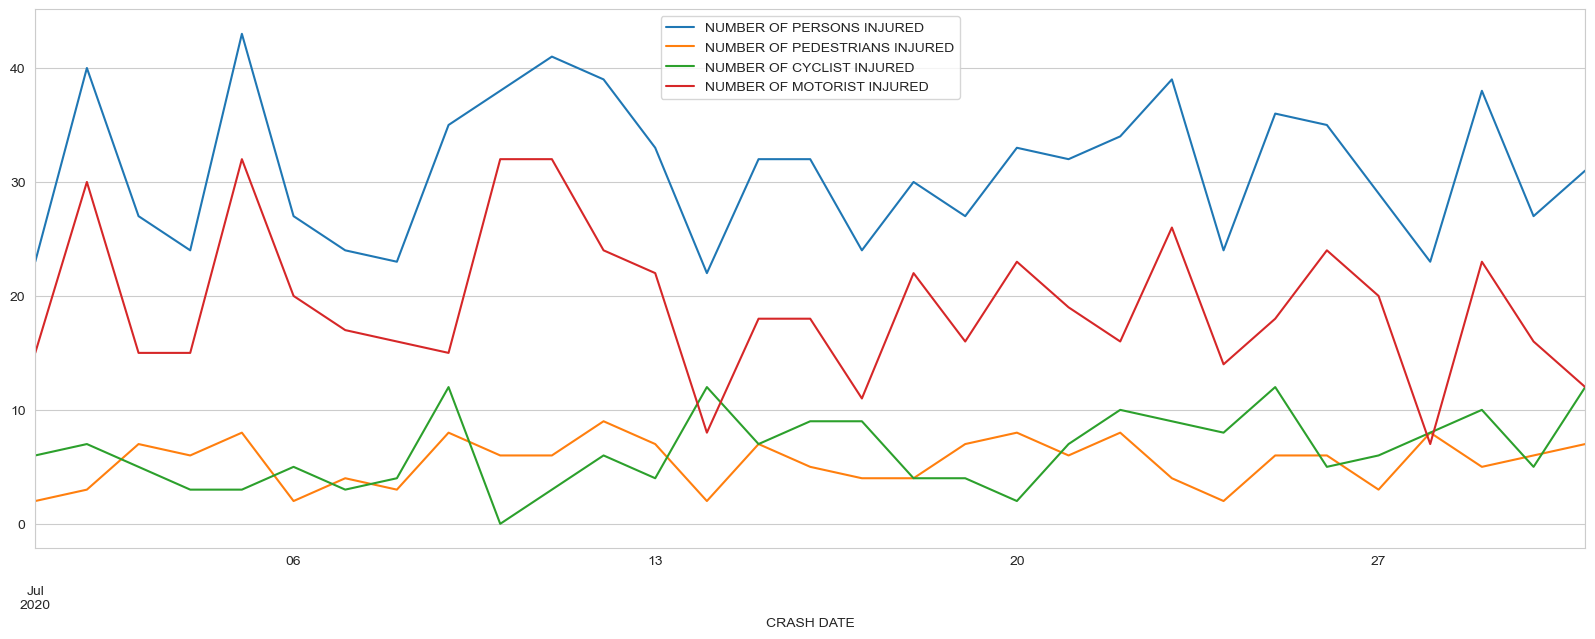

In [25]:
# Q4 How was July of 2020 different then July of 2022? 
# Figure out how to show or demonstrate the difference. What was the reported cause of the accidents?
(july_2020[ped_cyc_mot_columns].groupby('CRASH DATE')
 .agg({f'{c}':"sum" for c in ped_cyc_mot_columns[1:]})
.filter(regex = '.*INJURED.*')
 .plot(kind='line', figsize=(20, 7)))

<Axes: xlabel='CRASH DATE'>

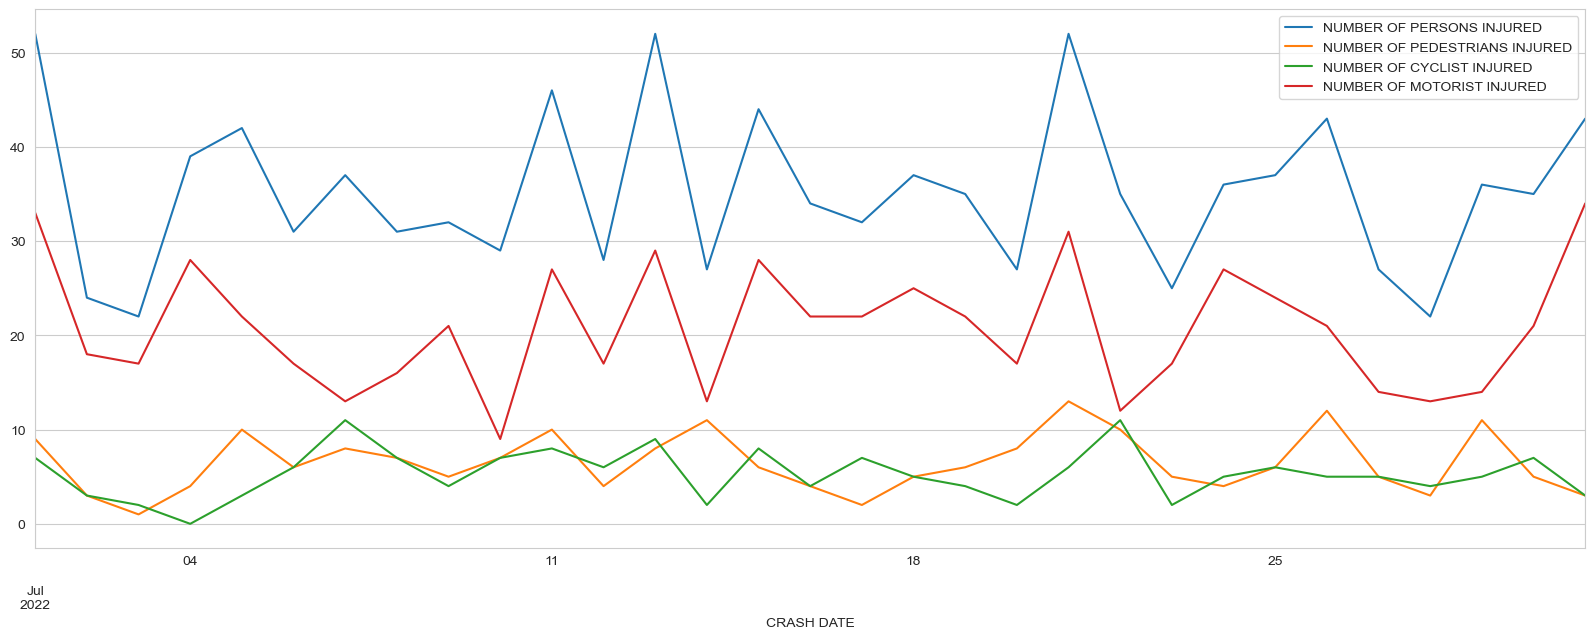

In [26]:
# Q4 How was July of 2020 different then July of 2022? 
# Figure out how to show or demonstrate the difference. What was the reported cause of the accidents?
(july_2022[ped_cyc_mot_columns].groupby('CRASH DATE')
 .agg({f'{c}': "sum" for c in ped_cyc_mot_columns[1:]})
 .filter(regex='.*INJURED.*')
 .plot(kind='line', figsize=(20, 7)))

<Axes: xlabel='CRASH DATE'>

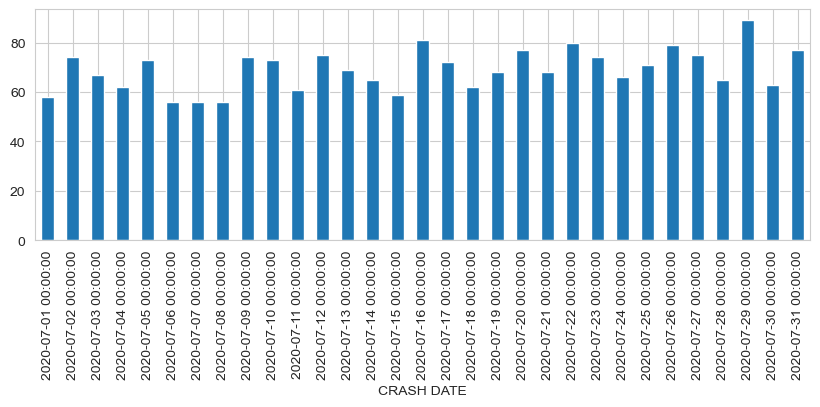

In [27]:
# Q4 How was July of 2020 different then July of 2022? 
# Figure out how to show or demonstrate the difference. What was the reported cause of the accidents?
july_2020.groupby('CRASH DATE').size().plot(kind='bar', figsize=(10,3))

<Axes: xlabel='CRASH DATE'>

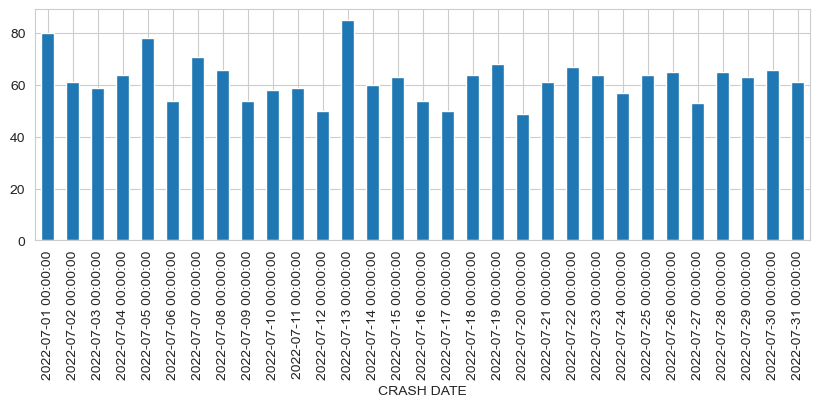

In [28]:
# Q4 How was July of 2020 different then July of 2022? 
# Figure out how to show or demonstrate the difference. What was the reported cause of the accidents?
july_2022.groupby('CRASH DATE').size().plot(kind='bar', figsize=(10, 3))

In [29]:
# Q4 How was July of 2020 different then July of 2022? 
# Figure out how to show or demonstrate the difference. What was the reported cause of the accidents?
july_2020[['CONTRIBUTING FACTOR VEHICLE 1']].value_counts()

CONTRIBUTING FACTOR VEHICLE 1                        
Unspecified                                              769
Driver Inattention/Distraction                           519
Failure to Yield Right-of-Way                            143
Following Too Closely                                     79
Passing or Lane Usage Improper                            77
Backing Unsafely                                          60
Other Vehicular                                           57
Passing Too Closely                                       54
Traffic Control Disregarded                               53
Unsafe Speed                                              48
Driver Inexperience                                       42
Turning Improperly                                        39
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     26
Aggressive Driving/Road Rage                              24
Alcohol Involvement                                       21
Oversized Vehicle              

In [30]:
# Q4 How was July of 2020 different then July of 2022? 
# Figure out how to show or demonstrate the difference. What was the reported cause of the accidents?
july_2022[['CONTRIBUTING FACTOR VEHICLE 1']].value_counts()

CONTRIBUTING FACTOR VEHICLE 1                        
Unspecified                                              609
Driver Inattention/Distraction                           509
Failure to Yield Right-of-Way                            116
Passing Too Closely                                       83
Passing or Lane Usage Improper                            71
Following Too Closely                                     70
Backing Unsafely                                          67
Unsafe Speed                                              64
Traffic Control Disregarded                               62
Other Vehicular                                           43
Driver Inexperience                                       41
Turning Improperly                                        30
Alcohol Involvement                                       24
Pedestrian/Bicyclist/Other Pedestrian Error/Confusion     21
Unsafe Lane Changing                                      17
Reaction to Uninvolved Vehicle 

In [33]:
# Q5
(df[(df['CRASH DATE']> '2020-01-01')& (df['CRASH DATE']< '2022-10-01')]
 .groupby('CRASH DATE')
 .size()
 .to_frame("accs_per_day")
 .sort_values(by='CRASH DATE')
 .rolling(window=60,min_periods=1)
 .sum()
 .idxmax()
 )



accs_per_day   2020-03-13
dtype: datetime64[ns]

Question 6 and 7

In [34]:
temp=df.copy()
temp['day_of_week'] = temp['CRASH DATE'].dt.dayofweek
temp['day_of_week']=temp['day_of_week'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
temp.groupby('day_of_week').size()

day_of_week
Friday       21899
Monday       19907
Saturday     18376
Sunday       17283
Thursday     20565
Tuesday      20278
Wednesday    20063
dtype: int64

In [39]:
temp['CRASH TIME'] = pd.to_datetime(temp['CRASH TIME']) 
temp['Hour'] = temp['CRASH TIME'].dt.hour
temp['Time Interval'] = pd.cut(temp['Hour'], bins=range(0, 25))
interval_counts = temp['Time Interval'].value_counts()
most_accidents_interval = interval_counts.idxmax()
hourly_counts = temp['Hour'].value_counts()
hourly_counts

hourly_counts = temp['Hour'].value_counts()

# Filter the counts to include only the hours between 6 AM and 12 PM
morning_hours_counts = hourly_counts[hourly_counts.index.isin(range(6, 13))]

print(morning_hours_counts)

Hour
12    7634
11    7153
8     7017
9     6772
10    6731
7     4348
6     2872
Name: count, dtype: int64


In [ ]:

# Filter data for the year 2022
temp['Year'] = temp['CRASH DATE'].dt.year
# print(temp['Year'].value_counts())
data_2022 = temp[temp['Year'] == 2022]
print(data_2022['Year'].value_counts())


accidents_per_day_2022 = data_2022['CRASH DATE'].dt.date.value_counts().head(10)

print("Top 10 days with the most accidents in 2022:", accidents_per_day_2022)


In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

specific_date_df = dataset[dataset['CRASH DATE'] == '2022-08-08']

specific_date_df = specific_date_df.dropna(subset=['LATITUDE', 'LONGITUDE'])

map_center = [specific_date_df['LATITUDE'].mean(), specific_date_df['LONGITUDE'].mean()]
m = folium.Map(location=map_center, zoom_start=11)

# Add a heatmap to the map
HeatMap(data=specific_date_df[['LATITUDE', 'LONGITUDE']].values.tolist(), radius=15).add_to(m)

# Save to HTML (optional) or directly display
m.save('2022-06-17_accidents_heatmap.html')
m  # Display the map in a Jupyter notebook
